In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
car_data = pd.read_csv("Resource/Crash_information_(Last_5_Years).csv")
car_data.head()

,X,Y,OBJECTID,ACC_ID,ROAD_NO,ROAD_NAME,COMMON_ROAD_NAME,CWAY,SLK,INTERSECTION_NO,...,ACCIDENT_TYPE,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
0,115.792274,-32.029452,27585440,10231294,1190012,Preston Point Rd,Preston Point Rd,S,0.86,47160.0,...,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0
1,115.821106,-31.901343,27585441,10231300,H561,Hutton St on to Mitchell Fwy (Southbound),Hutton St on to Mitchell Fwy (Southbound),S,0.00,4347.0,...,Intersection,PDO Major,Rear End,NaN,0,0,0,0,2,0
2,115.970937,-32.066115,27585442,10231306,1040003,Spencer Rd,Spencer Rd,L,4.97,43773.0,...,Intersection,PDO Major,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
3,115.852685,-31.952160,27585443,10231312,1240111,Hay St,Hay St,S,2.92,NaN,...,Midblock,PDO Minor,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
4,115.949014,-31.906427,27585444,10231318,1110017,Palmerston St,Palmerston St,S,0.47,37514.0,...,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0


In [ ]:
car_data.columns

In [ ]:
# look at data
car_data.describe()

In [4]:
# filter out data not needed
car_df = car_data.drop(columns=["X","Y","OBJECTID","ROAD_NO","ROAD_NAME", "COMMON_ROAD_NAME", "CWAY", "SLK", "INTERSECTION_NO", "INTERSECTION_DESC"])
car_df.head()

,ACC_ID,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,ACCIDENT_TYPE,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
0,10231294,115.792274,-32.029452,07/05/2020,1020.0,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0
1,10231300,115.821106,-31.901343,07/05/2020,1525.0,Intersection,PDO Major,Rear End,NaN,0,0,0,0,2,0
2,10231306,115.970937,-32.066115,06/05/2020,1155.0,Intersection,PDO Major,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
3,10231312,115.852685,-31.952160,06/05/2020,845.0,Midblock,PDO Minor,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
4,10231318,115.949014,-31.906427,04/05/2020,700.0,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0


In [5]:
# different types of crashes
pedest = (car_df["TOTAL_PEDESTRIANS_INVOLVED"]>0).sum()
vehicles = (car_df["TOTAL_OTHER_VEHICLES_INVOLVED"]>0).sum()
motocycles = (car_df["TOTAL_MOTOR_CYCLE_INVOLVED"]>0).sum()
trucks = (car_df["TOTAL_TRUCK_INVOLVED"]>0).sum()
heavy_trucks = (car_df["TOTAL_HEAVY_TRUCK_INVOLVED"]>0).sum()
bikes = (car_df["TOTAL_BIKE_INVOLVED"]>0).sum()
total = len(car_df)

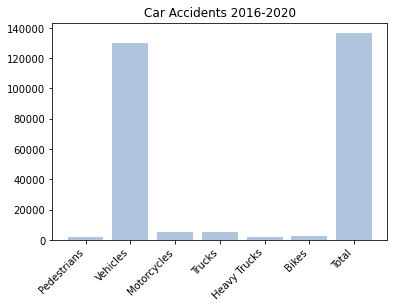

In [82]:
types = ["Pedestrians", "Vehicles", "Motorcycles", "Trucks", "Heavy Trucks", "Bikes", "Total"]
crash_types = [pedest, vehicles, motocycles, trucks, heavy_trucks, bikes, total]
x_axis = np.arange(len(crash_types))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, crash_types, color="lightsteelblue")
plt.title("Car Accidents 2016-2020")
plt.xticks(tick_locations, types, rotation=45,horizontalalignment="right")
plt.savefig("Car_accidents_5yrs.png")
plt.show()

In [23]:
# slice the date to only include year
car_df["CRASH_DATE"] = car_df["CRASH_DATE"].str[-4:]
car_df

,ACC_ID,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,ACCIDENT_TYPE,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
0,10231294,115.792274,-32.029452,2020,1020.0,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0
1,10231300,115.821106,-31.901343,2020,1525.0,Intersection,PDO Major,Rear End,NaN,0,0,0,0,2,0
2,10231306,115.970937,-32.066115,2020,1155.0,Intersection,PDO Major,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
3,10231312,115.852685,-31.952160,2020,845.0,Midblock,PDO Minor,Sideswipe Same Dirn,Involving Overtaking,0,0,0,0,2,0
4,10231318,115.949014,-31.906427,2020,700.0,Intersection,PDO Major,Right Angle,NaN,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136671,10246888,115.759319,-31.746864,2020,850.0,Midblock,Medical,Rear End,NaN,0,1,0,0,1,0
136672,10246912,115.848896,-32.225176,2020,630.0,Midblock,Medical,Rear End,NaN,0,0,0,0,2,0
136673,10246918,115.918802,-31.985293,2020,2050.0,Midblock,PDO Major,Hit Object,Entering / Leaving Driveway,1,0,0,0,1,0
136674,10246924,115.791280,-32.074725,2020,1755.0,Intersection,PDO Major,Right Turn Thru,NaN,0,0,0,0,2,0


In [61]:
car_df["REGION"] = ""

In [77]:
# add region to dataframe
car_df["REGION"] = car_df.LATITUDE.apply(lambda x: "Northern" if x>-31.5471024260016 else ("Metro" if x>-32.6343558722623 else "Southern"))
car_df.head()
car_df.to_csv("car_df.csv", index=False)


In [26]:
# filtered for pedestrians 
pedestrian_df = car_df[car_df["TOTAL_PEDESTRIANS_INVOLVED"]>0]
pedestrian_df

# save file
pedestrian_df.to_csv("pedestrian_data.csv", index=False)


In [39]:
pedestrian_df = pedestrian_df.copy()
pedestrian_df["REGION"] = ""
pedestrian_df.head()

,ACC_ID,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,ACCIDENT_TYPE,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED,REGION
132,10232359,121.460072,-30.758825,2020,1615.0,Intersection,PDO Major,Rear End,NaN,0,0,0,0,2,1,
197,10232904,115.714737,-33.321952,2020,1835.0,Intersection,PDO Major,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,1,
227,10233140,115.772579,-31.734973,2020,100.0,Midblock,Fatal,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,1,
432,10226903,115.961555,-31.861525,2020,856.0,Midblock,Fatal,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,1,
464,10227223,116.007399,-32.075582,2020,630.0,Midblock,PDO Minor,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,1,


In [37]:

# group attacks by year
accidents_by_year_total = pedestrian_df.groupby('CRASH_DATE')['TOTAL_PEDESTRIANS_INVOLVED'].count()
accidents_by_year_total

CRASH_DATE
2016    452
2017    506
2018    458
2019    452
2020    391
Name: TOTAL_PEDESTRIANS_INVOLVED, dtype: int64

In [41]:
# Split into regions
for index,row in pedestrian_df.iterrows():
    # northern region above latitude -31.5471024260016
    if pedestrian_df.loc[index,'LATITUDE'] > -31.5471024260016:
        #print("North")
        pedestrian_df.loc[index, 'REGION'] = "Northern"
    # metro region above latitude -32.6343558722623
    elif pedestrian_df.loc[index,'LATITUDE'] > -32.6343558722623:
        #print("Metro")
        pedestrian_df.loc[index, 'REGION'] = "Metro"
    # southern region below metro
    elif pedestrian_df.loc[index,'LATITUDE'] < -32.6343558722623:
        #print("South")
        pedestrian_df.loc[index, 'REGION'] = "Southern"
    # catch error
    else:
        print(f"Unexpected latitude value in row {index}")

In [43]:
pedestrian_df.head()

,ACC_ID,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,ACCIDENT_TYPE,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED,REGION
132,10232359,121.460072,-30.758825,2020,1615.0,Intersection,PDO Major,Rear End,NaN,0,0,0,0,2,1,Northern
197,10232904,115.714737,-33.321952,2020,1835.0,Intersection,PDO Major,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,1,Southern
227,10233140,115.772579,-31.734973,2020,100.0,Midblock,Fatal,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,1,Metro
432,10226903,115.961555,-31.861525,2020,856.0,Midblock,Fatal,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,1,Metro
464,10227223,116.007399,-32.075582,2020,630.0,Midblock,PDO Minor,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,1,Metro


In [44]:

result = pedestrian_df.groupby(['CRASH_DATE','REGION'])['TOTAL_PEDESTRIANS_INVOLVED'].count()
result

CRASH_DATE  REGION  
2016        Metro       382
            Northern     37
            Southern     33
2017        Metro       427
            Northern     51
            Southern     28
2018        Metro       396
            Northern     34
            Southern     28
2019        Metro       387
            Northern     39
            Southern     26
2020        Metro       325
            Northern     34
            Southern     32
Name: TOTAL_PEDESTRIANS_INVOLVED, dtype: int64

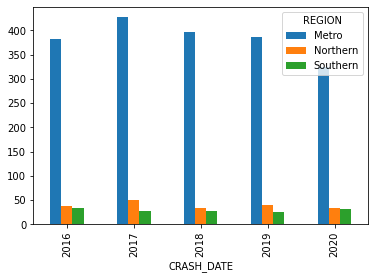

In [51]:
result.unstack().plot(kind='bar')

In [58]:
bar_result = result.unstack()

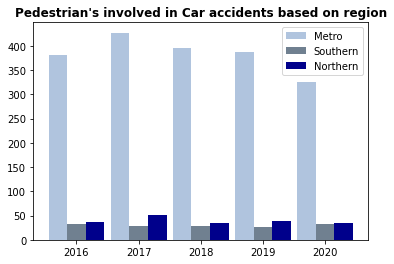

In [83]:

w = 0.3
x= bar_result.index
Metro=bar_result["Metro"]
Southern=bar_result["Southern"]
Northern=bar_result["Northern"]

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]

plt.bar(bar1,Metro,w,label="Metro", color="lightsteelblue")
plt.bar(bar2,Southern,w,label="Southern",color="slategray")
plt.bar(bar3,Northern,w,label="Northern", color="darkblue")
plt.xticks(bar1+w,[2016, 2017, 2018, 2019, 2020])
plt.legend(loc='best')
plt.title("Pedestrian's involved in Car accidents based on region", fontweight='bold')
plt.savefig("pedestrian accidents by region.png")
plt.show()

In [90]:
# all_accidents = car_df.groupby(['CRASH_DATE','REGION'])["TOTAL_OTHER_VEHICLES_INVOLVED","TOTAL_MOTOR_CYCLE_INVOLVED","TOTAL_HEAVY_TRUCK_INVOLVED","TOTAL_TRUCK_INVOLVED","TOTAL_BIKE_INVOLVED",'TOTAL_PEDESTRIANS_INVOLVED'].count()
# all_accidents

C:\Users\Mel\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


TOTAL_OTHER_VEHICLES_INVOLVED  \
CRASH_DATE REGION                                    
2016       Metro                             27051   
           Northern                           1273   
           Southern                           2093   
2017       Metro                             24809   
           Northern                           1240   
           Southern                           1972   
2018       Metro                             24727   
           Northern                           1223   
           Southern                           1897   
2019       Metro                             23914   
           Northern                           1290   
           Southern                           1901   
2020       Metro                             20368   
           Northern                           1153   
           Southern                           1765   

                     TOTAL_MOTOR_CYCLE_INVOLVED  TOTAL_HEAVY_TRUCK_INVOLVED  \
CRASH_DATE REGION                                                             
2016       Metro                          27051                       27051   
           Northern                        1273                        1273   
           Southern                        2093                        2093   
2017       Metro                          24809                       24809   
           Northern                        1240                        1240   
           Southern                        1972                        1972   
2018       Metro                          24727                       24727   
           Northern                        1223                        1223   
           Southern                        1897                        1897   
2019       Metro                          23914                       23914   
           Northern                        1290                        1290   
           Southern                        1901                        1901   
2020       Metro                          20368                       20368   
           Northern                        1153                        1153   
           Southern                        1765                        1765   

                     TOTAL_TRUCK_INVOLVED  TOTAL_BIKE_INVOLVED  \
CRASH_DATE REGION                                                
2016       Metro                    27051                27051   
           Northern                  1273                 1273   
           Southern                  2093                 2093   
2017       Metro                    24809                24809   
           Northern                  1240                 1240   
           Southern                  1972                 1972   
2018       Metro                    24727                24727   
           Northern                  1223                 1223   
           Southern                  1897                 1897   
2019       Metro                    23914                23914   
           Northern                  1290                 1290   
           Southern                  1901                 1901   
2020       Metro                    20368                20368   
           Northern                  1153                 1153   
           Southern                  1765                 1765   

                     TOTAL_PEDESTRIANS_INVOLVED  
CRASH_DATE REGION                                
2016       Metro                          27051  
           Northern                        1273  
           Southern                        2093  
2017       Metro                          24809  
           Northern                        1240  
           Southern                        1972  
2018       Metro                          24727  
           Northern                        1223  
           Southern                        1897  
2019       Metro                          23914  
           Northern                

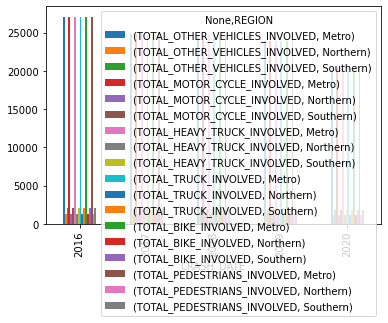

In [87]:
all_accidents.unstack().plot(kind='bar')
